In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt 

In [2]:
HDFrame = pd.read_csv('heart.csv')

<AxesSubplot:xlabel='age', ylabel='chol'>

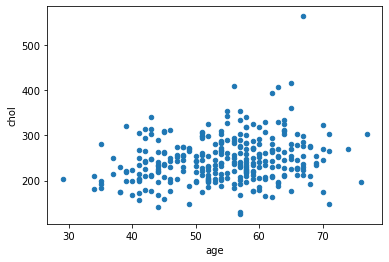

In [3]:
#Plotting age against cholesterol levels 
HDFrame.plot.scatter(x = 'age', y='chol')

In [4]:
HDFrame
#shuffling the dataset 
HDFrame = HDFrame.sample(frac=1).reset_index(drop=True)
HDFrame

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,67,0,0,106,223,0,1,142,0,0.3,2,2,2,1
1,56,1,2,130,256,1,0,142,1,0.6,1,1,1,0
2,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
3,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
4,64,1,3,110,211,0,0,144,1,1.8,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,41,1,1,110,235,0,1,153,0,0.0,2,0,2,1
299,63,0,0,108,269,0,1,169,1,1.8,1,2,2,0
300,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
301,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0


In [5]:
#Testing classification machine learning 
#feeding all inputs to KNN (output is rest ecg value)
#choosing the values for the x component 
#x1 = HDFrame.iloc[:,:6].values
#print(x1)
#print('dimension of x1',x1.shape)
#x2 = HDFrame.iloc[:,7:].values
#print(x2)
#print('dimension of x2', x2.shape)
#concatenating x1 and x2 to x 
#x = np.concatenate((x1,x2),axis=1)
#print(x)
#print('dimension of x', x.shape)

#now let's assign the output to restecg 
#y = HDFrame.iloc[:,6:7].values
#print('The assigned output array',y)

x = HDFrame.iloc[:,:13].values
print(x)
y = HDFrame.iloc[:,13:].values
print(y)

[[67.  0.  0. ...  2.  2.  2.]
 [56.  1.  2. ...  1.  1.  1.]
 [56.  0.  1. ...  1.  0.  2.]
 ...
 [68.  1.  2. ...  1.  0.  3.]
 [40.  1.  0. ...  2.  0.  3.]
 [57.  0.  0. ...  2.  1.  2.]]
[[1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0

In [6]:
#settings up the train/test split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242, 1)
(61, 1)


In [7]:
#feeding the training data to the KNN classifier object
KNNClassifier = KNeighborsClassifier(n_neighbors = 2)
KNNClassifier.fit(x_train,y_train.ravel())

KNeighborsClassifier(n_neighbors=2)

In [8]:
#testing if the classifier can predict the correct label for the given test data 
y_pred = KNNClassifier.predict(x_test)

In [9]:
#testing the accuracy of the predicted y with the actual y value 
accuracy_score(y_pred,y_test)

0.639344262295082

In [10]:
print(y_test.ravel())

[1 0 1 0 0 1 1 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0
 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1]


In [11]:
print(y_pred)

[1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 0 0
 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0]


In [12]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.54      0.80      0.65        25
           1       0.79      0.53      0.63        36

    accuracy                           0.64        61
   macro avg       0.67      0.66      0.64        61
weighted avg       0.69      0.64      0.64        61



In [13]:
error = []
for i in range(1,100): 
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(x_train,y_train.ravel())
    pred_y = classifier.predict(x_test)
    error.append(np.mean(pred_y != y_test))

In [14]:
error

[0.4955657081429723,
 0.5192152647137867,
 0.48965331900026876,
 0.5103466809997312,
 0.4778285407148616,
 0.4985219027143241,
 0.48374092985756517,
 0.4955657081429723,
 0.4778285407148616,
 0.48669712442891694,
 0.48374092985756517,
 0.4955657081429723,
 0.4778285407148616,
 0.4926095135716205,
 0.4748723461435098,
 0.48669712442891694,
 0.47191615157215805,
 0.48374092985756517,
 0.47191615157215805,
 0.48669712442891694,
 0.4748723461435098,
 0.48669712442891694,
 0.4807847352862134,
 0.48965331900026876,
 0.4748723461435098,
 0.4807847352862134,
 0.4689599570008062,
 0.4748723461435098,
 0.47191615157215805,
 0.4778285407148616,
 0.4689599570008062,
 0.47191615157215805,
 0.4689599570008062,
 0.4748723461435098,
 0.47191615157215805,
 0.4778285407148616,
 0.47191615157215805,
 0.4748723461435098,
 0.46600376242945446,
 0.4689599570008062,
 0.46600376242945446,
 0.47191615157215805,
 0.47191615157215805,
 0.4748723461435098,
 0.46600376242945446,
 0.4778285407148616,
 0.46600376242

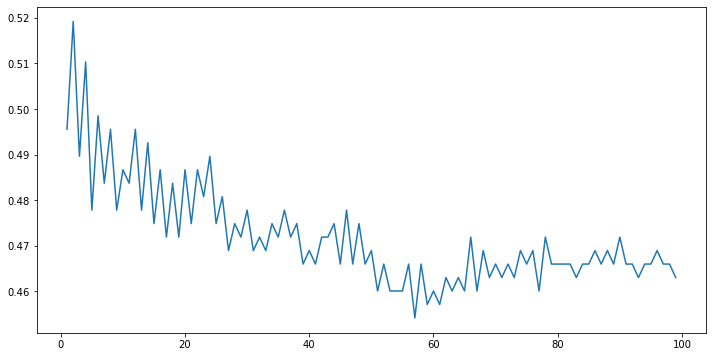

In [15]:
#let's graph the k value against the error rate 
plt.figure(figsize=(12,6))
plt.plot(range(1,100),error)
#we can see that with the increase in the k value we see a spotty distinct increase 
#in the error that we see 

In [16]:
#pycaret implementation for the heart rate disease CSV file 
pyCaretFrame = pd.read_csv('heart.csv')
from pycaret.classification import *

In [17]:
data = pyCaretFrame.sample(frac=0.80,random_state=786)
data_unseen = pyCaretFrame.drop(data.index)
data.reset_index(inplace=True,drop=True)
data_unseen.reset_index(inplace=True,drop=True)
print('Data for modeling: '+str(data.shape))
print('Unseen data for predictions: '+str(data_unseen.shape))

Data for modeling: (242, 14)
Unseen data for predictions: (61, 14)


In [18]:
exp_clf101 = setup(data=data,target='output',session_id=123)

,Description,Value
0,session_id,123
1,Target,output
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(242, 14)"
5,Missing Values,False
6,Numeric Features,5
7,Categorical Features,8
8,Ordinal Features,False
9,High Cardinality Features,False


In [19]:
#using the pycaret bulk modeling feature where it predicts all the potential 
#models 
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8522,0.8965,0.8918,0.8724,0.8792,0.6873,0.6951,0.3480
nb,Naive Bayes,0.8463,0.8587,0.9227,0.8411,0.8776,0.6718,0.6842,0.0050
et,Extra Trees Classifier,0.8463,0.8887,0.9018,0.8573,0.8762,0.6727,0.6811,0.0580
ridge,Ridge Classifier,0.8404,0.0000,0.8827,0.8597,0.8684,0.6649,0.6726,0.0060
rf,Random Forest Classifier,0.8404,0.8831,0.8927,0.8534,0.8707,0.6622,0.6685,0.0690
lda,Linear Discriminant Analysis,0.8404,0.8929,0.8827,0.8597,0.8684,0.6649,0.6726,0.0060
lightgbm,Light Gradient Boosting Machine,0.8228,0.8926,0.8718,0.8390,0.8517,0.6288,0.6388,0.0650
gbc,Gradient Boosting Classifier,0.7993,0.8735,0.8827,0.8045,0.8387,0.5717,0.5860,0.0260
ada,Ada Boost Classifier,0.7812,0.8229,0.8727,0.7941,0.8262,0.5323,0.5497,0.0310
dt,Decision Tree Classifier,0.7688,0.7626,0.7918,0.8253,0.8032,0.5209,0.5312,0.0050


In [20]:
#according to pycaret, logistic regression is the best approach to be taken 
#let's import a logistic regression classifier for our exploration 

HDFrame = pd.read_csv('heart.csv')
HDFrame
#shuffling the dataset 
HDFrame = HDFrame.sample(frac=1).reset_index(drop=True)
HDFrame
x = HDFrame.iloc[:,:13].values
print(x)
y = HDFrame.iloc[:,13:].values
print(y)

[[48.  0.  2. ...  2.  0.  2.]
 [58.  0.  0. ...  1.  2.  1.]
 [56.  1.  0. ...  0.  0.  3.]
 ...
 [66.  0.  3. ...  0.  0.  2.]
 [47.  1.  2. ...  2.  0.  2.]
 [43.  1.  2. ...  2.  1.  2.]]
[[1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0

In [21]:
#settings up the train/test split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20)


print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242, 1)
(61, 1)


In [22]:
#creating the logistic regression classifier
logisticClassifier = LogisticRegression(random_state=0)
logisticClassifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
#predicting output values 
y_pred = logisticClassifier.predict(x_test)

In [24]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [25]:
y_test.ravel()

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

Average precision-recall score: 0.84
0.819672131147541
0.8717948717948718


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.84')

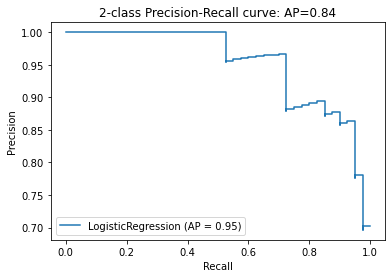

In [26]:
average_precision = average_precision_score(y_test, y_pred)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
print(accuracy_score(y_pred,y_test))
print(recall_score(y_pred,y_test))

disp = plot_precision_recall_curve(logisticClassifier, x_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))
# 81 percent accuracy 

In [27]:
#This proves that using logistic regression for this particular example is the best approach 


In [28]:
#let's also try naive bayes 
naiveClassifier = GaussianNB() 
naiveClassifier.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [29]:
y_pred = naiveClassifier.predict(x_test)

In [30]:
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [31]:
y_test.ravel()

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1], dtype=int64)

Average precision-recall score: 0.83
0.819672131147541
0.8536585365853658


Text(0.5, 1.0, '2-class Precision-Recall curve: AP=0.83')

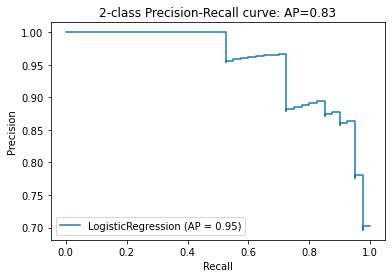

In [32]:
average_precision = average_precision_score(y_test, y_pred)
print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
print(accuracy_score(y_pred,y_test))
print(recall_score(y_pred,y_test))

disp = plot_precision_recall_curve(logisticClassifier, x_test, y_test)
disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))